In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 504 images belonging to 3 classes.
Found 126 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3810 - loss: 2.8411

16/16 ━━━━━━━━━━━━━━━━━━━━ 214s 12s/step - accuracy: 0.3837 - loss: 2.8085 - val_accuracy: 0.3571 - val_loss: 1.0833
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 728ms/step - accuracy: 0.4202 - loss: 2.0131

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 905ms/step - accuracy: 0.4222 - loss: 1.9932 - val_accuracy: 0.3968 - val_loss: 1.0824
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 900ms/step - accuracy: 0.4986 - loss: 1.2786 - val_accuracy: 0.3413 - val_loss: 1.1087
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 894ms/step - accuracy: 0.4227 - loss: 1.2771 - val_accuracy: 0.3333 - val_loss: 1.1808
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 902ms/step - accuracy: 0.5125 - loss: 1.1773 - val_accuracy: 0.3333 - val_loss: 1.1996
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 866ms/step - accuracy: 0.5288 - loss: 1.1674 - val_accuracy: 0.3333 - val_loss: 1.2051
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 894ms/step - accuracy: 0.4936 - loss: 1.2243 - val_accuracy: 0.3413 - val_loss: 1.3253


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 626ms/step

Classification Report:
              precision    recall  f1-score   support

          EB       0.56      0.21      0.31        42
          NB       0.38      1.00      0.55        42
          RB       0.00      0.00      0.00        42

    accuracy                           0.40       126
   macro avg       0.31      0.40      0.29       126
weighted avg       0.31      0.40      0.29       126



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


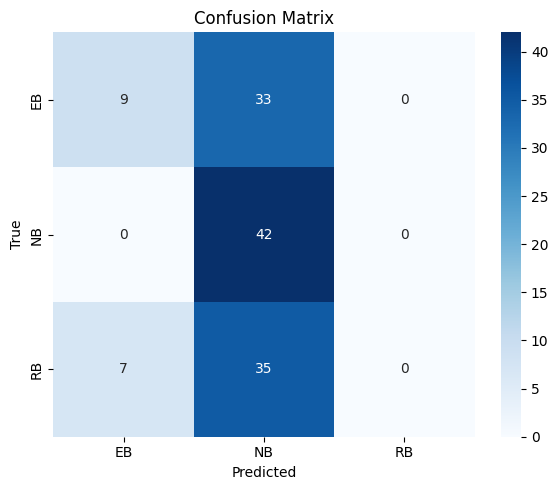

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
DATA_DIR = '/content/drive/MyDrive/spectrogram'  # Update if needed

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 30
NUM_CLASSES = 3

# Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=15
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Model Definition
model = Sequential()

# Block 1
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_decreasing_cnn.h5', save_best_only=True)
]

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)

# Save Model
model.save('final_decreasing_cnn_model.h5')

# -----------------------------------
# Evaluation: Confusion Matrix & Report
# -----------------------------------

# Predict on validation set
val_generator.reset()
pred_probs = model.predict(val_generator)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 504 images belonging to 3 classes.
Found 126 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.3213 - loss: 6.1980 - val_accuracy: 0.3333 - val_loss: 1.1037
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.3918 - loss: 2.1795 - val_accuracy: 0.3730 - val_loss: 1.0985
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 900ms/step - accuracy: 0.4091 - loss: 1.0688 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 897ms/step - accuracy: 0.4218 - loss: 1.0513 - val_accuracy: 0.3333 - val_loss: 1.0990
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4570 - loss: 1.0587 - val_accuracy: 0.3333 - val_loss: 1.0984
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 906ms/step - accuracy: 0.4073 - loss: 1.0526 - val_accuracy: 0.3333 - val_loss: 1.0991
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 876ms/step - accuracy: 0.4472 - loss: 1.0399 - val_accuracy: 0.3333 - val_loss: 1.0994
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 901ms/step - accuracy: 0.4373 - loss: 1.0224 - val_accuracy: 0.3

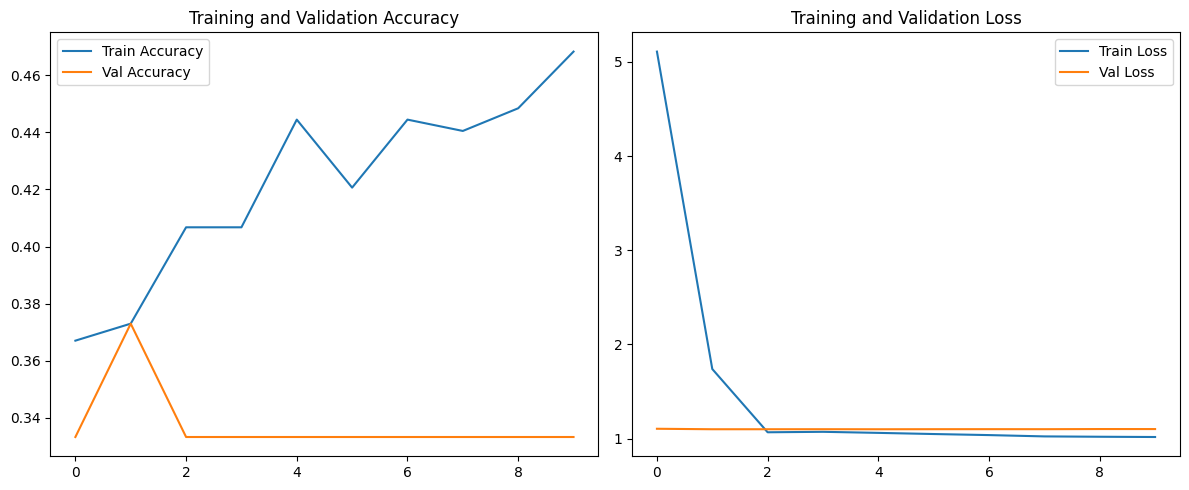

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 690ms/step
Classification Report:
              precision    recall  f1-score   support

          EB       0.00      0.00      0.00        42
          NB       0.33      1.00      0.50        42
          RB       0.00      0.00      0.00        42

    accuracy                           0.33       126
   macro avg       0.11      0.33      0.17       126
weighted avg       0.11      0.33      0.17       126



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


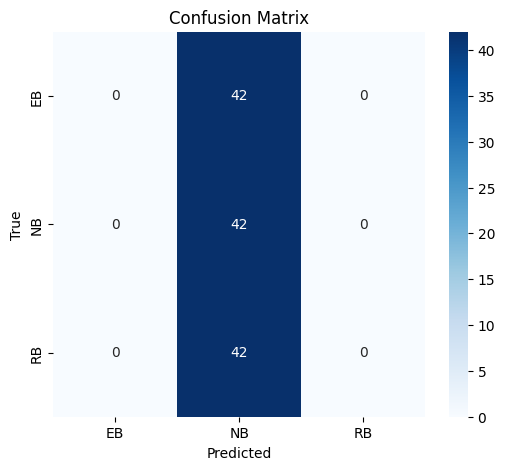

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paths
DATA_DIR = '/content/drive/MyDrive/spectrogram'  # Make sure this path is correct

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 30
NUM_CLASSES = 3

# Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=15
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Build Improved CNN Model
model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))

# Block 1
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Classification
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_cnn.keras', save_best_only=True)
]

# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)

# Save final model
model.save('final_cnn_model.keras')

# Accuracy and Loss Plots
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Evaluate with Confusion Matrix and Classification Report
val_generator.reset()
preds = model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
